# Non Linear Data Classification

In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn")

In [2]:
x,y=make_circles(n_samples=500,noise=0.02)

In [3]:
print(x.shape,y.shape)

(500, 2) (500,)


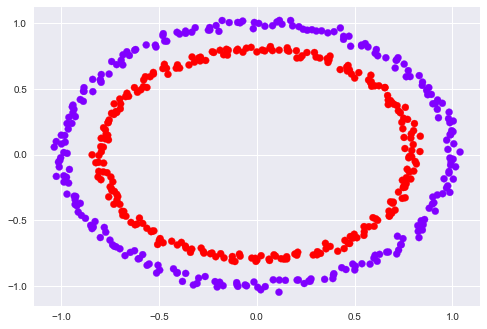

In [4]:
plt.scatter(x[:,0],x[:,1],c=y,cmap="rainbow")
plt.show()

In [5]:
def cal_phi(x):
    # Non - linear Transformation
    # [x1 x2 x1**2+x2**2]
    x1=x[:,0]
    x2=x[:,1]
    x3=x1**2+x2**2
    
    x_bar = np.zeros((x.shape[0],3))
    print(x_bar.shape)
    
    x_bar[:,:2]=x
    x_bar[:,2]=x3
    
    return x_bar

In [6]:
X = cal_phi(x)

(500, 3)


In [7]:
print(X[:3])

[[-0.07137544  0.77809665  0.61052886]
 [-0.28485064 -0.71161355  0.58753373]
 [-0.72878039 -0.28019722  0.60963134]]


In [8]:
print(x[:3])

[[-0.07137544  0.77809665]
 [-0.28485064 -0.71161355]
 [-0.72878039 -0.28019722]]


In [9]:
def plot3D(x,show=True):
    fig=plt.figure(figsize=(12,12))
    ax=fig.add_subplot(111,projection='3d')
    x1=x[:,0]
    x2=x[:,1]
    x3=x[:,2]
    ax.scatter(x1,x2,x3,zdir='z',c=y,s=20,depthshade=True,cmap="rainbow")
    if(show==True):
        plt.show()
    return ax

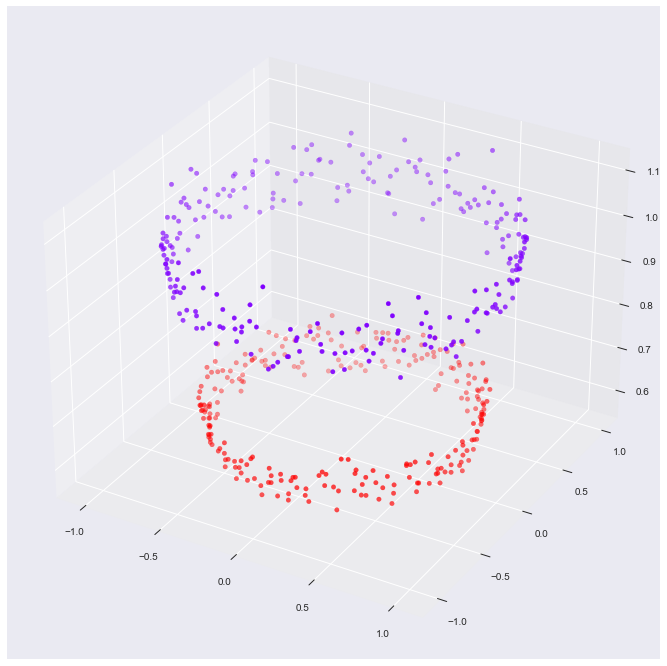

<Axes3DSubplot:>

In [10]:
plot3D(X)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [12]:
LR = LogisticRegression()

In [13]:
LR_accuracy = cross_val_score(LR,x,y,cv=5).mean()
print("2D Logistic Regression Accuracy: ",LR_accuracy*100)

2D Logistic Regression Accuracy:  44.800000000000004


In [14]:
LR_accuracy = cross_val_score(LR,X,y,cv=5).mean()
print("3D Logistic Regression Accuracy: ",LR_accuracy*100)

3D Logistic Regression Accuracy:  100.0


In [15]:
#Fit LR into data
LR.fit(X,y)

LogisticRegression()

In [16]:
W=LR.coef_

In [17]:
B=LR.intercept_

# Equation of plane : ax+by+cz+d=0

ax+by+cz+d=0

z= -[(ax+by+d)/c]

a - W[0,0]

b - W[0,1]

c - W[0,2]

d - Bias

x - generate dummy matrix

y - generate dummy matrix

In [18]:
dummy_x,dummy_y=np.meshgrid(range(-2,2),range(-2,2))

In [19]:
print(dummy_x)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]


In [20]:
print(dummy_y)

[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [21]:
dummy_z = - ((W[0,0])*dummy_x + (W[0,1])*dummy_y+B)/(W[0,2])

In [22]:
dummy_z

array([[0.80960137, 0.81150063, 0.8133999 , 0.81529916],
       [0.81100678, 0.81290605, 0.81480531, 0.81670457],
       [0.8124122 , 0.81431146, 0.81621072, 0.81810999],
       [0.81381761, 0.81571687, 0.81761614, 0.8195154 ]])

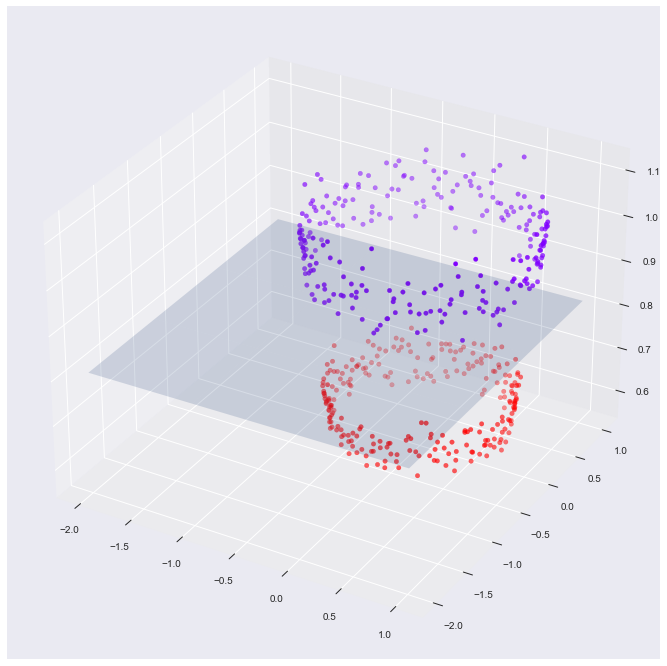

In [23]:
ax=plot3D(X,False)
ax.plot_surface(dummy_x,dummy_y,dummy_z,alpha=0.2)